In [1]:
from profiler.core import *

## 1. Instantiate Engine
* workers : number of processes
* tol     : tolerance for differences when creating training data (set to 0 if data is completely clean)
* eps     : error bound for inverse covariance estimation (since we use conservative calculation when determining minimum sample size, we recommend to set eps <= 0.01)
* embedtxt: if set to true, differentiate b/w textual data and categorical data, and use word embedding for the former

In [2]:
pf = Profiler(workers=1, tol=1e-6, eps=0.05, embedtxt=True)

## 2. Load Data
* name: any name you like
* src: \[FILE; DF; DB (not implemented)\]
* fpath: required if src == FILE
* df: required if src == DF
* check_param: print parameters used for data loading

In [3]:
pf.session.load_data(name='titanic', src=FILE, fpath='data/titanic.csv', check_param=True)

INFO:profiler.utility:[0.35846495628356934] Load Data start

INFO:profiler.data.dataset:parameters used for data loading:
 {'na_values': {'', 'nan', 'NaN', 'none', 'None', 'unknown', '?'}, 'sep': ',', 'header': 'infer', 'dropcol': None, 'dropna': False, 'encoding': 'utf-8', 'normalize': True, 'min_categories_for_embedding': 10}
INFO:profiler.utility:[0.35846495628356934] Load Data start

INFO:profiler.data.dataset:parameters used for data loading:
 {'na_values': {'', 'nan', 'NaN', 'none', 'None', 'unknown', '?'}, 'sep': ',', 'header': 'infer', 'dropcol': None, 'dropna': False, 'encoding': 'utf-8', 'normalize': True, 'min_categories_for_embedding': 10}
INFO:profiler.data.dataset:inferred types of attributes: {
    "PassengerId": "numeric",
    "Survived": "numeric",
    "Pclass": "numeric",
    "Name": "text",
    "Sex": "categorical",
    "Age": "numeric",
    "SibSp": "numeric",
    "Parch": "numeric",
    "Ticket": "text",
    "Fare": "numeric",
    "Cabin": "text",
    "Embarked": "

### 2.1 Change Data Types of Attributes
* required input:
    * a list of attributes
    * a list of data types (must match the order of the attributes; can be CATEGORICAL, NUMERIC, TEXT, DATE)
* optional input:
    * a list of regular expression extractor

### 2.2. Load/Train Embeddings for TEXT
* path: path to saved/to-save embedding folder
* load: set to true -- load saved vec from 'path'; set to false -- train locally
* save: (only for load = False) save trained vectors to 'path'

In [4]:
pf.session.load_embedding(save=True, path='data/titanic/', load=True)

INFO:profiler.utility:[1.095167875289917] Load Embedding start

INFO:profiler.utility:[1.095167875289917] Load Embedding start

INFO:profiler.utility:[1.144071102142334] Load Embedding execution time: 0.04890322685241699

INFO:profiler.utility:[1.144071102142334] Load Embedding execution time: 0.04890322685241699



## 3. Load Training Data
* multiplier: if set to None, will infer the minimal sample size; otherwise, it will create (# samples) * (# attributes) * (multiplier) training samples

In [5]:
pf.session.load_training_data(multiplier = None)

INFO:profiler.utility:[2.0617129802703857] Create Training Data start

INFO:profiler.utility:[2.0617129802703857] Create Training Data start

INFO:profiler.data.transformer:needs multiplier = 81 to bound the error in inv cov estimation <= 0.05000000
INFO:profiler.data.transformer:needs multiplier = 81 to bound the error in inv cov estimation <= 0.05000000
INFO:profiler.data.transformer:use multiplier = 81, and the bound is 0.00011798
INFO:profiler.data.transformer:use multiplier = 81, and the bound is 0.00011798
INFO:profiler.data.transformer:Draw Pairs
INFO:profiler.data.transformer:Draw Pairs
100%|██████████| 12/12 [00:00<00:00, 77.36it/s]

INFO:profiler.data.transformer:Number of training samples: 74844
INFO:profiler.data.transformer:Computing Differences
INFO:profiler.data.transformer:Number of training samples: 74844
INFO:profiler.data.transformer:Computing Differences
INFO:profiler.data.transformer:estimated missing data probability in training data is 0.0337
INFO:profiler.data.t

## 4. Learn Structure
* sparsity: intensity of L1-regularizer in inverse covariance estimation (glasso)
* take_neg: if set to true, consider equal -> equal only

In [6]:
autoregress_matrix = pf.session.learn_structure(sparsity=0.05, infer_order=True)

INFO:profiler.utility:[13.745280027389526] Learn Structure start

INFO:profiler.utility:[13.745280027389526] Learn Structure start

INFO:profiler.learner:use threshold 0.0226
INFO:profiler.learner:use threshold 0.0226
INFO:profiler.utility:[13.919506788253784] Learn Structure execution time: 0.1742267608642578

INFO:profiler.utility:[13.919506788253784] Learn Structure execution time: 0.1742267608642578



* score: 
    * "fit_error": mse for fitting y = B'X + c for each atttribute y 
    * "training_data_fd_vio_ratio": the higher the score, the more violations of FDs in the training data. (bounded: \[0,1\])

In [7]:
parent_sets = pf.session.get_dependencies(score="fit_error")

INFO:profiler.utility:[15.250137090682983] Get Dependencies start

INFO:profiler.utility:[15.250137090682983] Get Dependencies start

INFO:profiler.utility:[15.288966178894043] Get Dependencies execution time: 0.03882908821105957



Survived -> Sex (0.22576114556113838)
Pclass -> Cabin (0.2211970334222963)
SibSp -> Parch (0.21256505213083454)


INFO:profiler.utility:[15.288966178894043] Get Dependencies execution time: 0.03882908821105957



Survived -> Sex (0.22576114556113838)
Pclass -> Cabin (0.2211970334222963)
SibSp -> Parch (0.21256505213083454)


## 5. Visualization

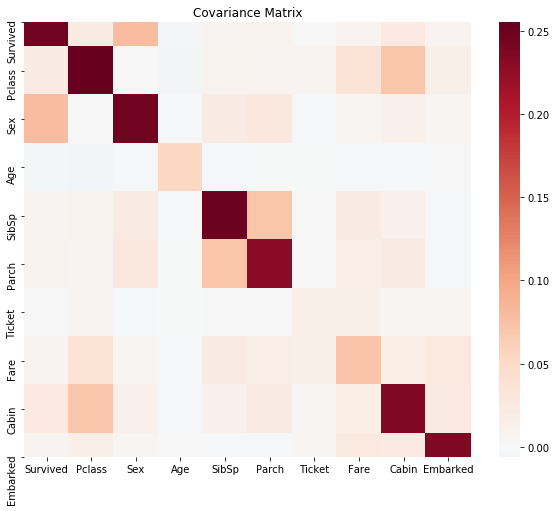

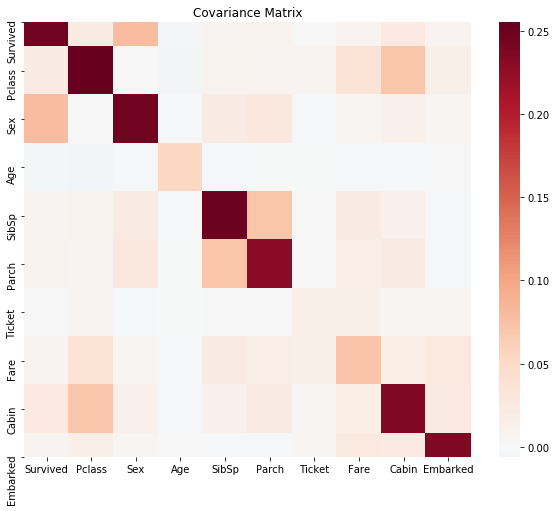

In [12]:
pf.session.visualize_covariance()

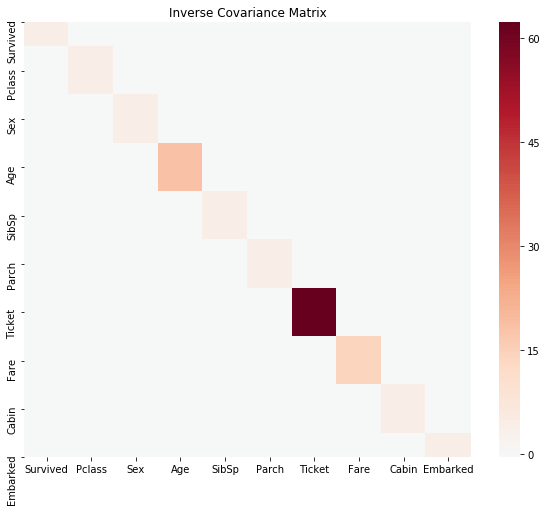

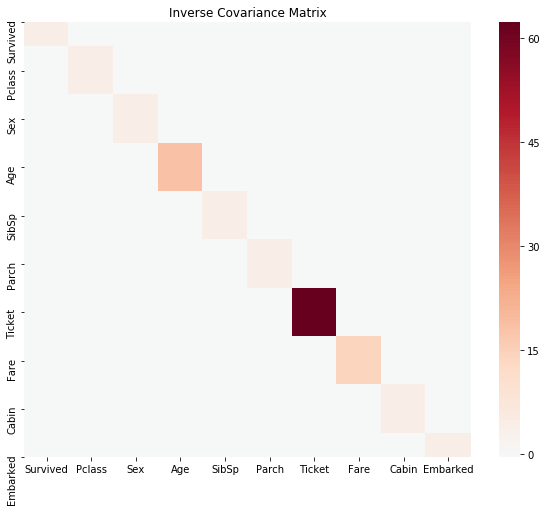

In [9]:
pf.session.visualize_inverse_covariance()

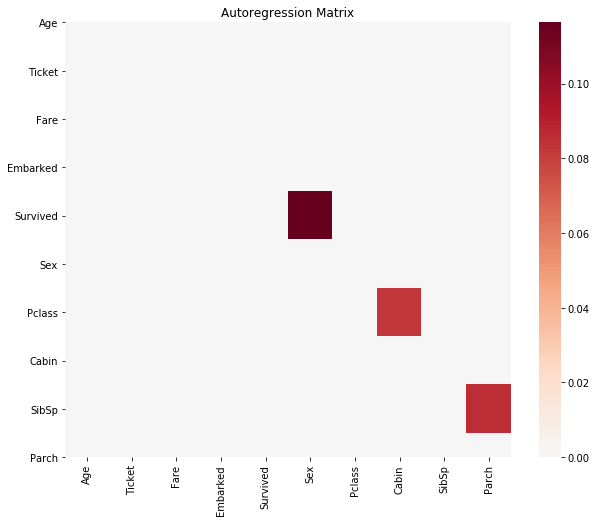

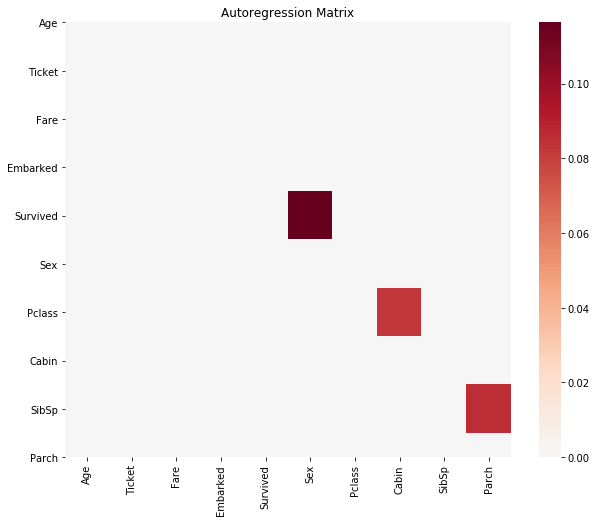

In [10]:
pf.session.visualize_autoregression()

In [11]:
pf.session.timer.get_stat()

,time_point,msg,execution_time
0,0.358465,start: Load Data,0.000000
1,0.405874,end: Load Data,0.047409
2,1.095168,start: Load Embedding,0.000000
3,1.144071,end: Load Embedding,0.048903
4,2.061713,start: Create Training Data,0.000000
5,13.715794,end: Create Training Data,11.654081
6,13.745280,start: Learn Structure,0.000000
7,13.919507,end: Learn Structure,0.174227
8,15.250137,start: Get Dependencies,0.000000
9,15.288966,end: Get Dependencies,0.038829


,time_point,msg,execution_time
0,0.358465,start: Load Data,0.000000
1,0.405874,end: Load Data,0.047409
2,1.095168,start: Load Embedding,0.000000
3,1.144071,end: Load Embedding,0.048903
4,2.061713,start: Create Training Data,0.000000
5,13.715794,end: Create Training Data,11.654081
6,13.745280,start: Learn Structure,0.000000
7,13.919507,end: Learn Structure,0.174227
8,15.250137,start: Get Dependencies,0.000000
9,15.288966,end: Get Dependencies,0.038829
